# Intro analysis to the dataset

Providing a simple visualization and classic statistical data analysis.

## 1. Dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.style as style
style.use('ggplot')
#print(style.available)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import csv
import datetime

from IPython.core.display import display, HTML

In [3]:
data = pd.read_csv("train.csv", header = 0)

## 2. Data samples and traits

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### 2.1. Data ranges

In [5]:
print("Dataset length: %i" % len(data))
# ---
print("vendor_id: [%s, %s]" % (min(data["vendor_id"]), max(data["vendor_id"])))

print(" ")

print("pickup_datetime: \t[%s, %s]" % (min(data["pickup_datetime"]), max(data["pickup_datetime"])))
print("dropoff_datetime: \t[%s, %s]" % (min(data["dropoff_datetime"]), max(data["dropoff_datetime"])))

print(" ")

print("pickup_longitude: \t[%s, %s]" % (min(data["pickup_longitude"]), max(data["pickup_longitude"])))
print("pickup_latitude: \t[%s, %s]" % (min(data["pickup_latitude"]), max(data["pickup_latitude"])))

print(" ")

print("dropoff_longitude: \t[%s, %s]" % (min(data["dropoff_longitude"]), max(data["dropoff_longitude"])))
print("dropoff_latitude: \t[%s, %s]" % (min(data["dropoff_latitude"]), max(data["dropoff_latitude"])))

print(" ")

print("store_and_fwd_flag: [%s, %s]" % (min(data["store_and_fwd_flag"]), max(data["store_and_fwd_flag"])))
print("passenger_count: [%s, %s]" % (min(data["passenger_count"]), max(data["passenger_count"])))

max_trip_d = max(data["trip_duration"])
m, s = divmod(max_trip_d, 60)
h, m = divmod(m, 60)
max_trip_d_f = "%d:%02d:%02d" % (h, m, s)
print("trip_duration: [%s, %s]" % (min(data["trip_duration"]), max_trip_d_f))
print("---max (seconds): ", max_trip_d)

Dataset length: 1458644
vendor_id: [1, 2]
 
pickup_datetime: 	[2016-01-01 00:00:17, 2016-06-30 23:59:39]
dropoff_datetime: 	[2016-01-01 00:03:31, 2016-07-01 23:02:03]
 
pickup_longitude: 	[-121.93334198, -61.3355293274]
pickup_latitude: 	[34.3596954346, 51.8810844421]
 
dropoff_longitude: 	[-121.933303833, -61.3355293274]
dropoff_latitude: 	[32.1811408997, 43.9210281372]
 
store_and_fwd_flag: [N, Y]
passenger_count: [0, 9]
trip_duration: [1, 979:31:22]
---max (seconds):  3526282


**Observations**:
+ Last maximum seems to be quite a big outlier.

## 3. Data cleaning

Check if data types are appropriate.

In [6]:
#print(data.columns.values)
print("vendor_id: %s" % data["vendor_id"].dtypes)

print("pickup_datetime:  %s" % data["pickup_datetime"].dtypes)
print("dropoff_datetime: %s" % data["dropoff_datetime"].dtypes)
print()
print("pickup_longitude:  %s" % data["pickup_longitude"].dtypes)
print("pickup_latitude:   %s" % data["pickup_latitude"].dtypes)
print("dropoff_longitude: %s" % data["dropoff_longitude"].dtypes)
print("dropoff_latitude:  %s" % data["dropoff_latitude"].dtypes)
print()
print("store_and_fwd_flag: %s" % data["store_and_fwd_flag"].dtypes)
print("passenger_count:    %s" % data["passenger_count"].dtypes)
print("trip_duration:      %s" % data["trip_duration"].dtypes)

vendor_id: int64
pickup_datetime:  object
dropoff_datetime: object

pickup_longitude:  float64
pickup_latitude:   float64
dropoff_longitude: float64
dropoff_latitude:  float64

store_and_fwd_flag: object
passenger_count:    int64
trip_duration:      int64


In [7]:
# resolution
data_clean = data
data_clean["pickup_datetime"]  = data_clean["pickup_datetime"].astype("datetime64")
data_clean["dropoff_datetime"] = data_clean["dropoff_datetime"].astype("datetime64")

c:\program files\python35\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


Prune outliers (similar approaches: trimming or [winsorizing](https://en.wikipedia.org/wiki/Winsorizing) data)

In [8]:
# chosen as ~91 min (by analyzing the distribution below beforehand)
data_clean = data_clean[data.trip_duration < 5500]

## 4. Data analysis - distributions

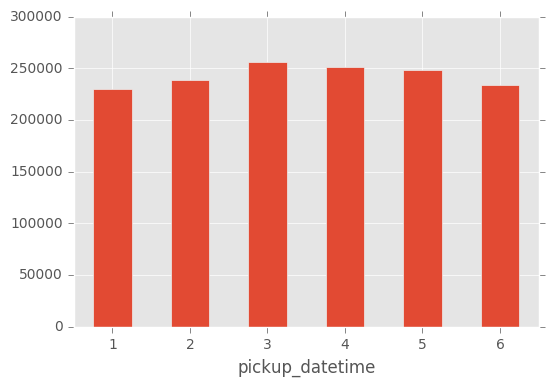

In [9]:
display(HTML('<center><h1>Analyzing distribution for the series</h1></center>'))
data["pickup_datetime"].groupby(data["pickup_datetime"].dt.month).count().plot(kind="bar", rot=0)

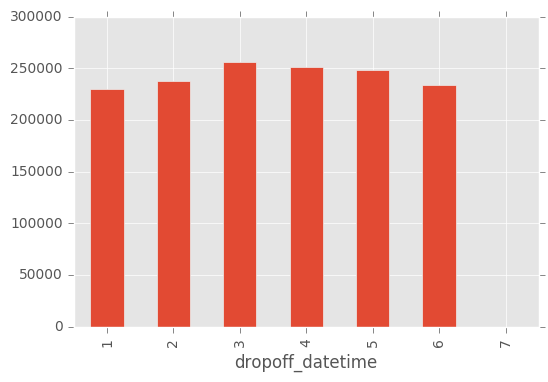

In [10]:
data["dropoff_datetime"].groupby(data["dropoff_datetime"].dt.month).count().plot(kind="bar")

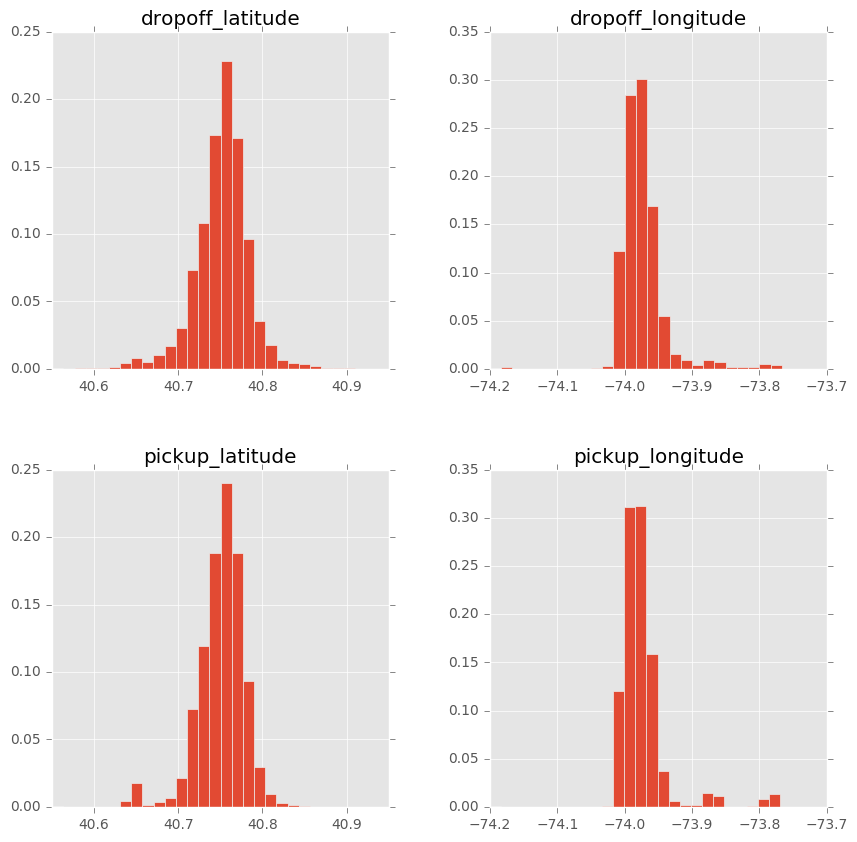

In [11]:
# initial
# xlim = [-80, -70]
# ylim = [40, 42]

xlim = [-74.2, -73.7]
ylim = [40.55, 40.95]

data_normalized = data_clean
data_normalized = data_normalized[(data_normalized.dropoff_latitude < ylim[1]) & (data_normalized.pickup_latitude < ylim[1])]
data_normalized = data_normalized[(data_normalized.dropoff_latitude > ylim[0]) & (data_normalized.pickup_latitude > ylim[0])]

data_normalized = data_normalized[(data_normalized.dropoff_longitude < xlim[1]) & (data_normalized.pickup_longitude < xlim[1])]
data_normalized = data_normalized[(data_normalized.dropoff_longitude > xlim[0]) & (data_normalized.pickup_longitude > xlim[0])]


data_normalized.hist(
    column=["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"],
    figsize=(10, 10),
    weights = np.ones_like(data_normalized.index) / len(data_normalized.index),
    bins = 30
    #,sharey=True, sharex=True
)
display(HTML('<center><h1>Analyzing distribution for location (normalized)</h1></center>'))

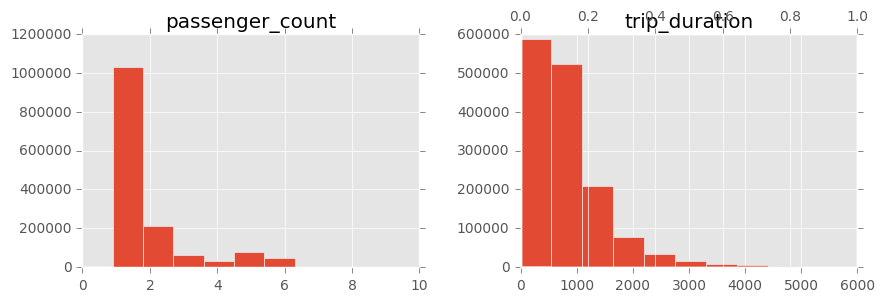

In [12]:
data_clean.hist(
    column=["passenger_count", "trip_duration"], #"store_and_fwd_flag", 
    figsize=(10, 3)
)
plt.twiny()
display(HTML('<center><h1>Analyzing distribution for the other parameters</h1></center>'))

### Conclusions on cleaned data without normalization
Most histograms appear to be **unimodal**, most of them **symmetric** with the **last 2** being **left-skewed**.

## 5. Visualize the clusterization

In [13]:
# some cleaning needed

# some big outliers are clogging the view
## values determined empirically with 0.05 marker plot below
xlim = [-74.2, -73.7] # -74.2, -73.85
ylim = [40.55, 40.95]

data_viz = data_clean
data_viz = data_viz[(data_viz.pickup_longitude > xlim[0]) & (data_viz.pickup_longitude < xlim[1])]
data_viz = data_viz[(data_viz.dropoff_longitude> xlim[0]) & (data_viz.dropoff_longitude< xlim[1])]
data_viz = data_viz[(data_viz.pickup_latitude  > ylim[0]) & (data_viz.pickup_latitude  < ylim[1])]
data_viz = data_viz[(data_viz.dropoff_latitude > ylim[0]) & (data_viz.dropoff_latitude < ylim[1])]

longitude: 	[-74.1999816895, -73.700302124]
latitude: 	[40.5508308411, 40.94972229]


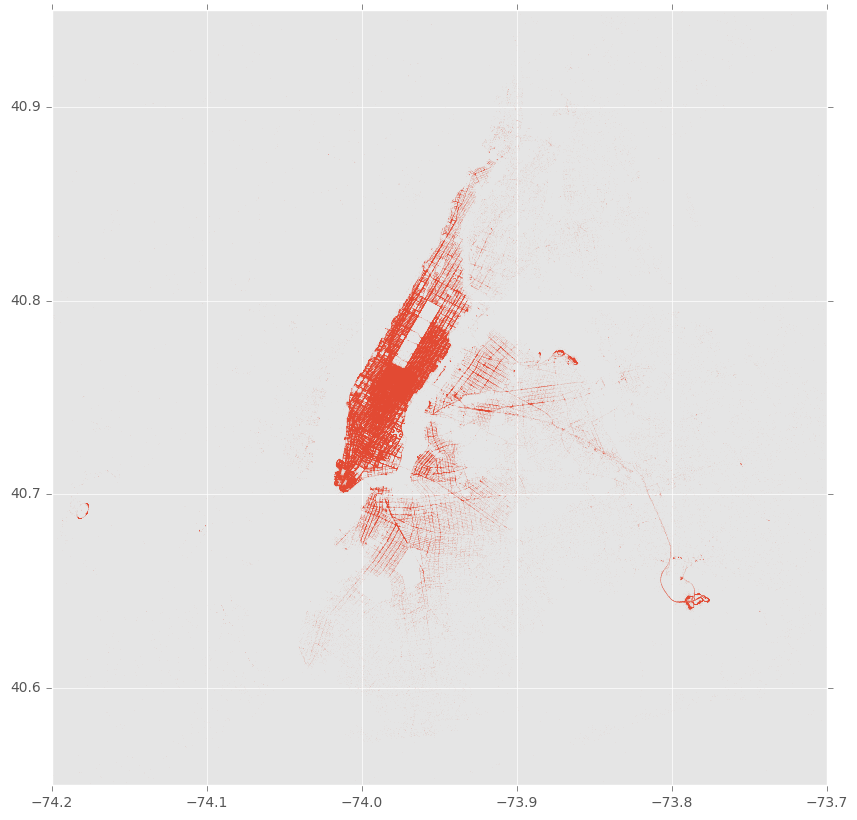

In [14]:
longitude = list(data_viz.pickup_longitude) + list(data_viz.dropoff_longitude)
latitude  = list(data_viz.pickup_latitude)  + list(data_viz.dropoff_latitude)

print("longitude: \t[%s, %s]" % (min(longitude), max(longitude)))
print("latitude: \t[%s, %s]" % (min(latitude), max(latitude)))

display(HTML('<center><h1>Scatter plot for points (estimating map)</h1></center>'))

plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
        # 0.05 (less time, best for visualization) #10 (more time, best for outliers)
plt.show()

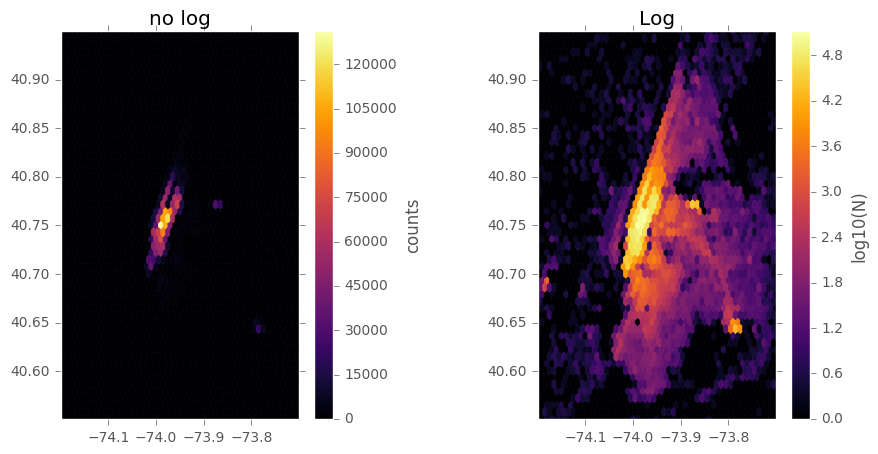

In [15]:
plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace = 0.6) # wspace=None
# wspace = 0.2   # the amount of width reserved for blank space between subplots

display(HTML('<center><h1>Examining clusterization density (hex binning)</h1></center>'))

plt.subplot(121),\
    plt.hexbin(longitude,latitude, gridsize=50, cmap='inferno'),\
    plt.title('no log')
plt.colorbar().set_label('counts')

plt.subplot(122),\
    plt.hexbin(longitude,latitude, gridsize=50, bins='log', cmap='inferno'),\
    plt.title('Log'),\
    #plt.plot(longitude,latitude,'.', alpha = 0.1, c='c', markersize = 0.05)
    
plt.colorbar().set_label('log10(N)')

plt.show()